# Multilevel models - Statistical Rethinking, Chapter 13

In [3]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from scipy import stats
from scipy.special import expit as logistic

In [17]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
# az.rcParams["stats.credible_interval"] = 0.89
az.rcParams["stats.hdi_prob"]=0.89
az.rcParams["stats.ic_scale"] = "deviance"
az.rcParams["stats.information_criterion"] = "waic"

In [10]:
d = pd.read_csv("data/reedfrogs.csv", sep=",")
print(d.shape)
d.head(8)

(48, 5)


,density,pred,size,surv,propsurv
0,10,no,big,9,0.9
1,10,no,big,10,1.0
2,10,no,big,7,0.7
3,10,no,big,10,1.0
4,10,no,small,9,0.9
5,10,no,small,9,0.9
6,10,no,small,10,1.0
7,10,no,small,9,0.9


##### Code 13.2 - non-hierarchical model

- likelihood function:
$S = Binomial(p, n)$
- p is the probability of survival. p follows a normally distributed variable but logit-transformed to a probability.
$logit(p_{tank}) = Normal(mu_{tank}, sigma_{tank})$, with mu=0 and p=1.5

Each tank is independent of each other, except we assume the same prior distribution for each one independently. But we do not learn about each tank and apply knowledge gained from the other tanks.

In [18]:
tank = np.arange(d.shape[0])
n_tanks = d.shape[0]

with pm.Model() as m_13_1:
    a = pm.Normal("a", 0, 1.5, shape=n_tanks)
    p = pm.math.invlogit(a[tank])
    
    S = pm.Binomial("S", n=d.density, p=p, observed=d.surv)
    
    trace_13_1 = pm.sample(random_seed=RANDOM_SEED)
    
az.summary(trace_13_1, round_to=2)

/tmp/ipykernel_1168/506671112.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_13_1 = pm.sample(random_seed=RANDOM_SEED)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
/root/miniconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],1.72,0.76,0.53,2.92,0.01,0.01,10051.30,2635.40,1.00
a[1],2.41,0.91,1.01,3.88,0.01,0.01,7551.47,2749.13,1.00
a[2],0.76,0.64,-0.25,1.78,0.01,0.01,9109.11,2714.10,1.00
a[3],2.42,0.90,0.96,3.83,0.01,0.01,7077.99,3033.69,1.00
a[4],1.73,0.77,0.52,2.97,0.01,0.01,9218.49,2690.64,1.00
a[5],1.73,0.78,0.53,2.98,0.01,0.01,8824.93,2824.19,1.00
a[6],2.39,0.88,1.03,3.77,0.01,0.01,8075.28,2912.97,1.01
a[7],1.72,0.77,0.60,2.97,0.01,0.01,9922.66,2750.56,1.00
a[8],-0.37,0.60,-1.26,0.62,0.01,0.01,9782.90,2825.68,1.00
a[9],1.70,0.74,0.52,2.86,0.01,0.01,8331.07,2599.39,1.00


#### Code 13.3 - the hierarchical model

In [19]:
with pm.Model() as m_13_2:
    a_bar = pm.Normal("a_bar", 0.0, 1.5) # tank popuation mean
    sigma = pm.Exponential("sigma", 1.0) # tank population variance
    
    a = pm.Normal("a", a_bar, sigma, shape=n_tanks)
    p = pm.math.invlogit(a[tank])
    
    S = pm.Binomial("S", n=d.density, p=p, observed=d.surv)
    trace_13_2 = pm.sample(random_seed=RANDOM_SEED)

/tmp/ipykernel_1168/2519854776.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_13_2 = pm.sample(random_seed=RANDOM_SEED)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, sigma, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


#### Code 13.4 - comparing models

In [23]:
with m_13_2, m_13_1:
    az.compare({"m13.1":trace_13_1, "m13_2":trace_13_2})

/root/miniconda3/lib/python3.9/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/root/miniconda3/lib/python3.9/site-packages/arviz/stats/stats.py:1405: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


       rank        waic     p_waic     d_waic        weight        se  \
m13_2     0  200.246320  20.977605   0.000000  1.000000e+00  7.280315   
m13.1     1  214.852043  25.686159  14.605723  1.678657e-13  4.707862   

            dse  warning waic_scale  
m13_2  0.000000     True   deviance  
m13.1  3.770049     True   deviance  


/root/miniconda3/lib/python3.9/site-packages/arviz/stats/stats.py:1405: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


In [24]:
az.compare({"m13.1":trace_13_1, "m13_2":trace_13_2})

/root/miniconda3/lib/python3.9/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/root/miniconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/root/miniconda3/lib/python3.9/site-packages/arviz/stats/stats.py:1405: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/root/miniconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m13_2,0,200.246320,20.977605,0.000000,1.000000e+00,7.280315,0.000000,True,deviance
m13.1,1,214.852043,25.686159,14.605723,1.678657e-13,4.707862,3.770049,True,deviance


In [25]:
propsurv_est = logistic(trace_13_2["a"].mean(0))

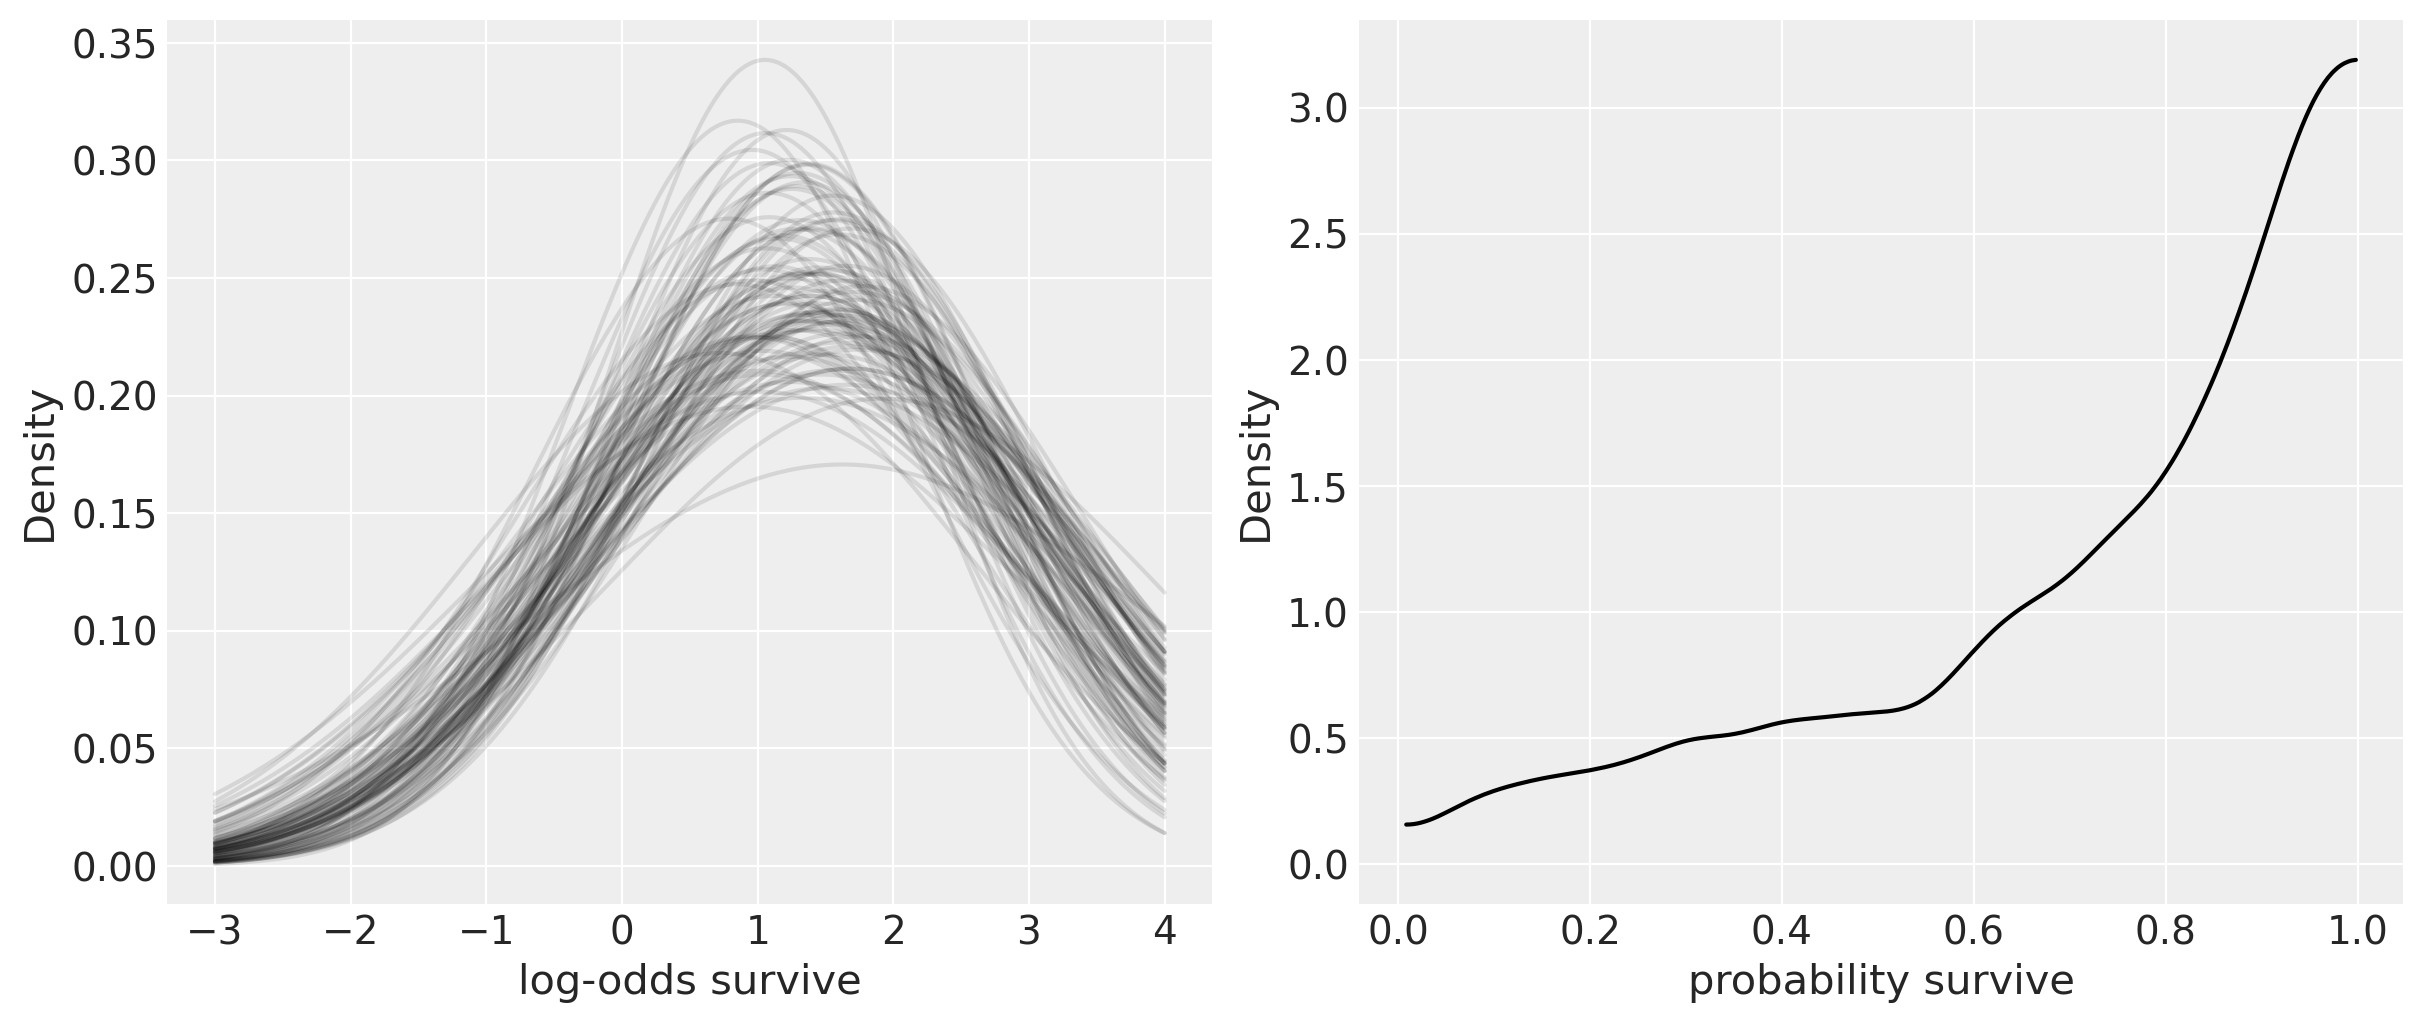

In [43]:
_, ax = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# show first 100 populations in the posterior
xrange = np.linspace(-3, 4, 200)
postcurve = [
    stats.norm.pdf(xrange, loc=trace_13_2["a_bar"][i], scale=trace_13_2["sigma"][i])
    for i in range(100)
]
ax[0].plot(xrange, np.asarray(postcurve).T, alpha=0.1, color="k")
ax[0].set_xlabel("log-odds survive")
ax[0].set_ylabel("Density")

# sample 8000 imaginary tanks from the posterior distribution
sim_tanks = np.random.normal(loc=trace_13_2["a_bar"], scale=trace_13_2["sigma"])

# transform to probability and visualize
az.plot_kde(logistic(sim_tanks), ax=ax[1], plot_kwargs={"color": "k"})
ax[1].set_xlabel("probability survive")
ax[1].set_ylabel("Density");